In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../datasets/BostonHousing.csv")

In [3]:
df.shape

(506, 14)

In [4]:
df.columns

Index(['Crime_rate', 'zn', 'indus', 'chas', 'nox', 'rm', 'Age', 'Distance',
       'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Crime_rate  506 non-null    float64
 1   zn          506 non-null    float64
 2   indus       506 non-null    float64
 3   chas        506 non-null    int64  
 4   nox         506 non-null    float64
 5   rm          501 non-null    float64
 6   Age         506 non-null    float64
 7   Distance    506 non-null    float64
 8   rad         506 non-null    int64  
 9   tax         506 non-null    int64  
 10  ptratio     506 non-null    float64
 11  b           506 non-null    float64
 12  lstat       506 non-null    float64
 13  medv        506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.describe()

,Crime_rate,zn,indus,chas,nox,rm,Age,Distance,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.head()

,Crime_rate,zn,indus,chas,nox,rm,Age,Distance,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
df.isnull().sum()

Crime_rate    0
zn            0
indus         0
chas          0
nox           0
rm            5
Age           0
Distance      0
rad           0
tax           0
ptratio       0
b             0
lstat         0
medv          0
dtype: int64

In [9]:
df["rm"] = df["rm"].fillna(np.mean(df["rm"]))

Text(0.5, 1.0, 'Features Heat-map')

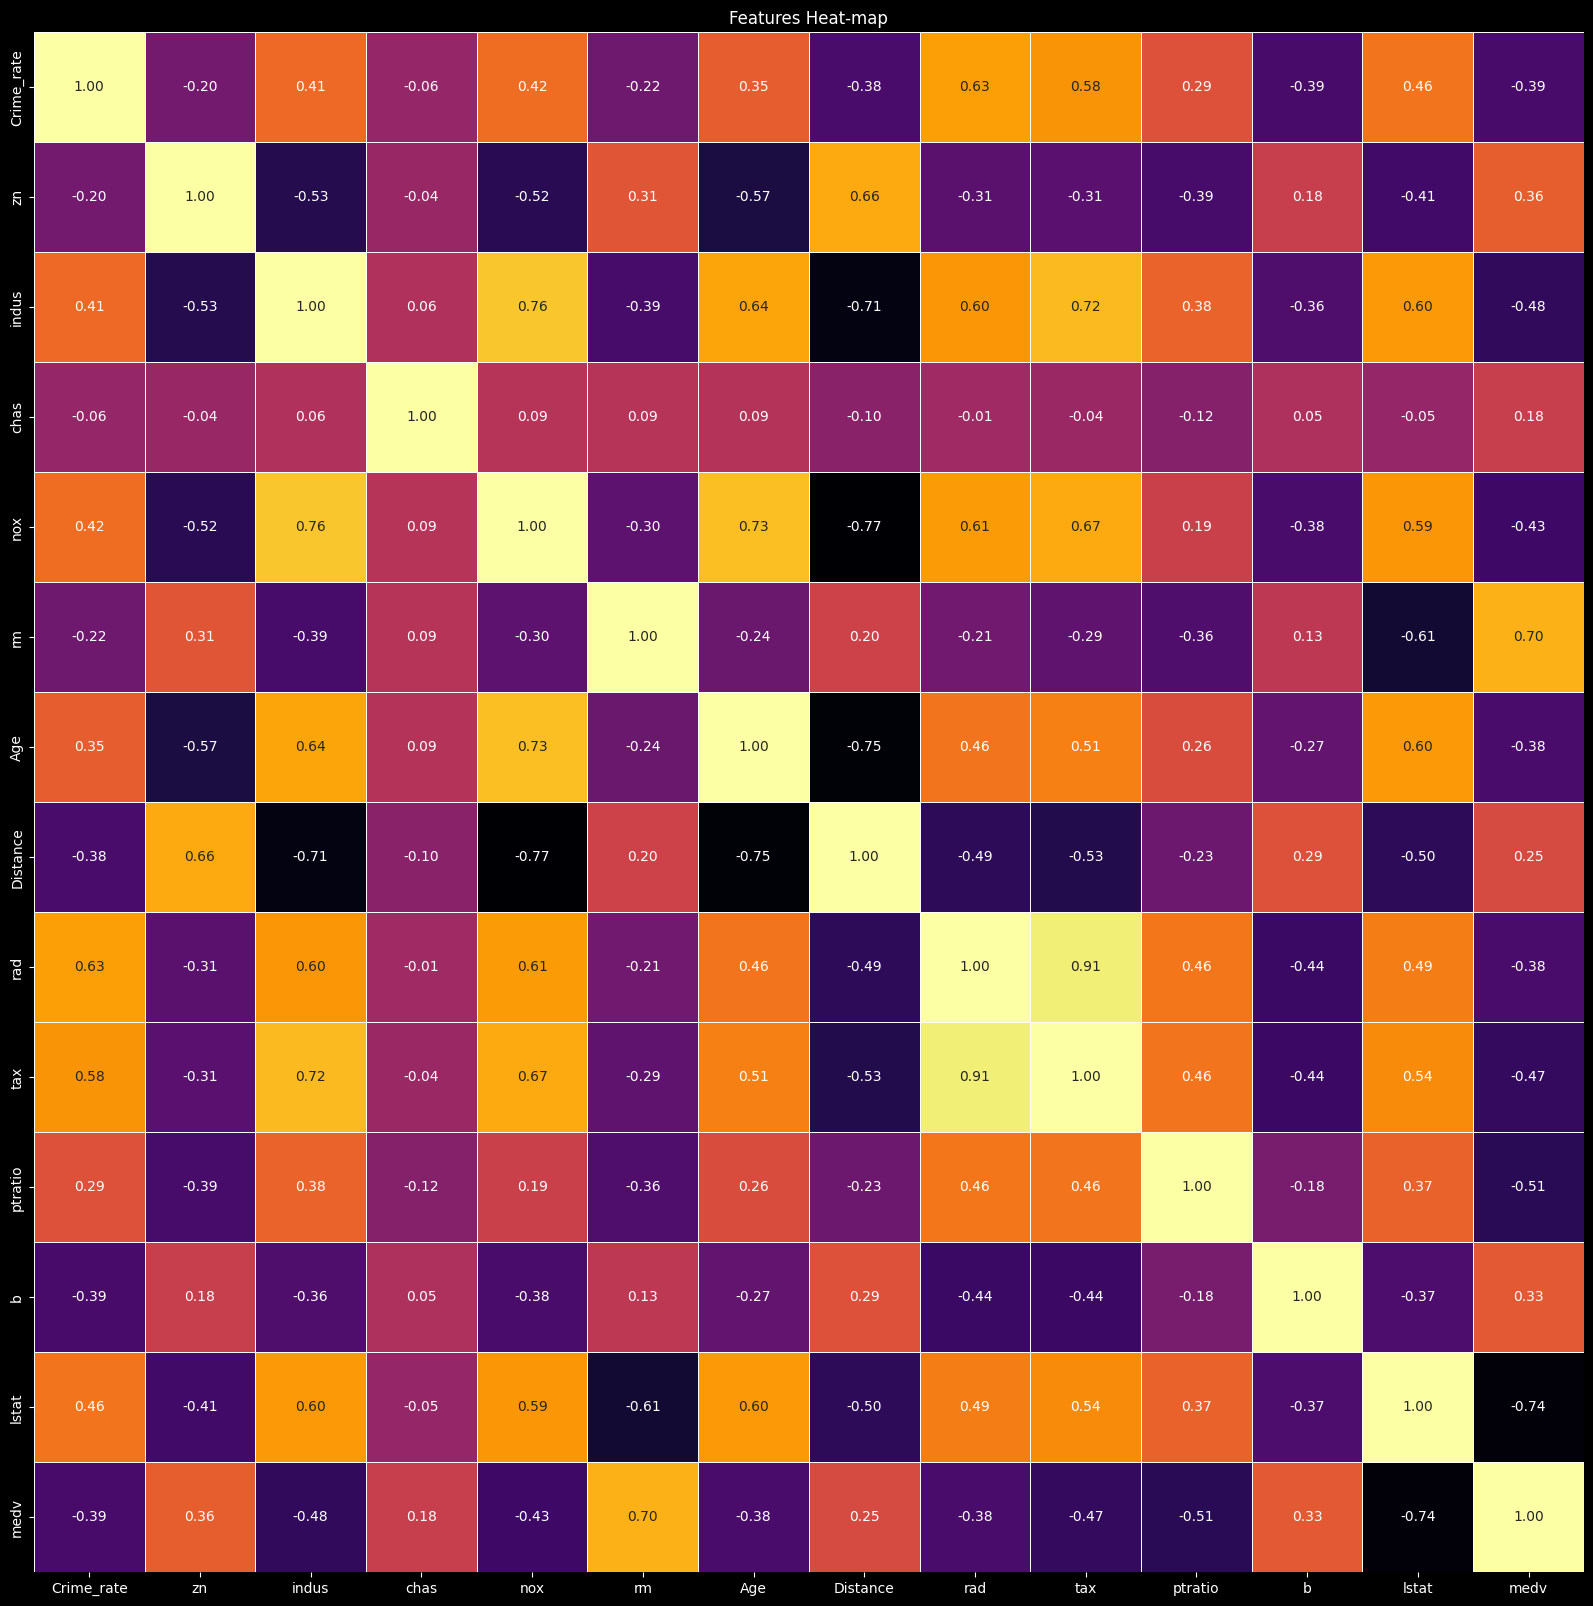

In [10]:
corr_matrix = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(
    corr_matrix,
    cmap="inferno",
    cbar=False,
    linewidths=0.5,
    linecolor="white",
    fmt="0.2f",
    annot=True,
)
plt.title("Features Heat-map")

In [11]:
target = corr_matrix["medv"]

corr_features = corr_matrix.iloc[:, :-1]
print(corr_features.columns)

Index(['Crime_rate', 'zn', 'indus', 'chas', 'nox', 'rm', 'Age', 'Distance',
       'rad', 'tax', 'ptratio', 'b', 'lstat'],
      dtype='object')


In [12]:
strong_features = target[target > 0.3].sort_values(ascending=False)
strong_features = strong_features.sort_values(ascending=False)
strong_features

medv    1.000000
rm      0.695375
zn      0.360445
b       0.333461
Name: medv, dtype: float64

In [13]:
strong_df = pd.DataFrame(strong_features[1:].reset_index())
strong_df.columns = ["Features", "Corr Coeff"]
strong_df

,Features,Corr Coeff
0,rm,0.695375
1,zn,0.360445
2,b,0.333461


In [14]:
features = list(strong_features.index)[1:]
target_feature = strong_features.index[0]
features

['rm', 'zn', 'b']

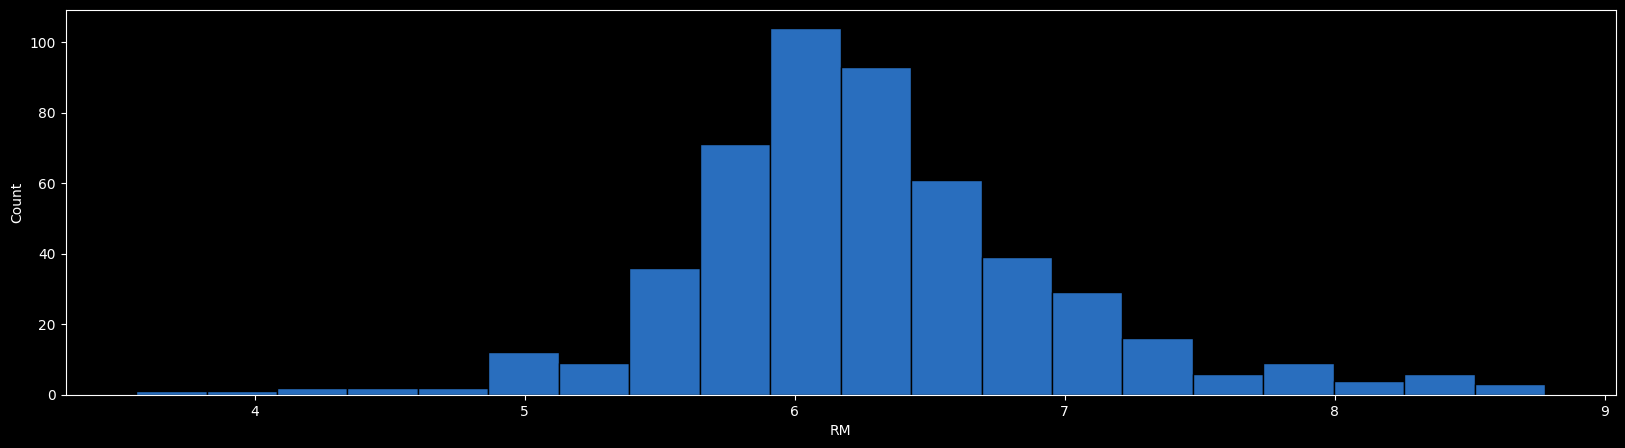

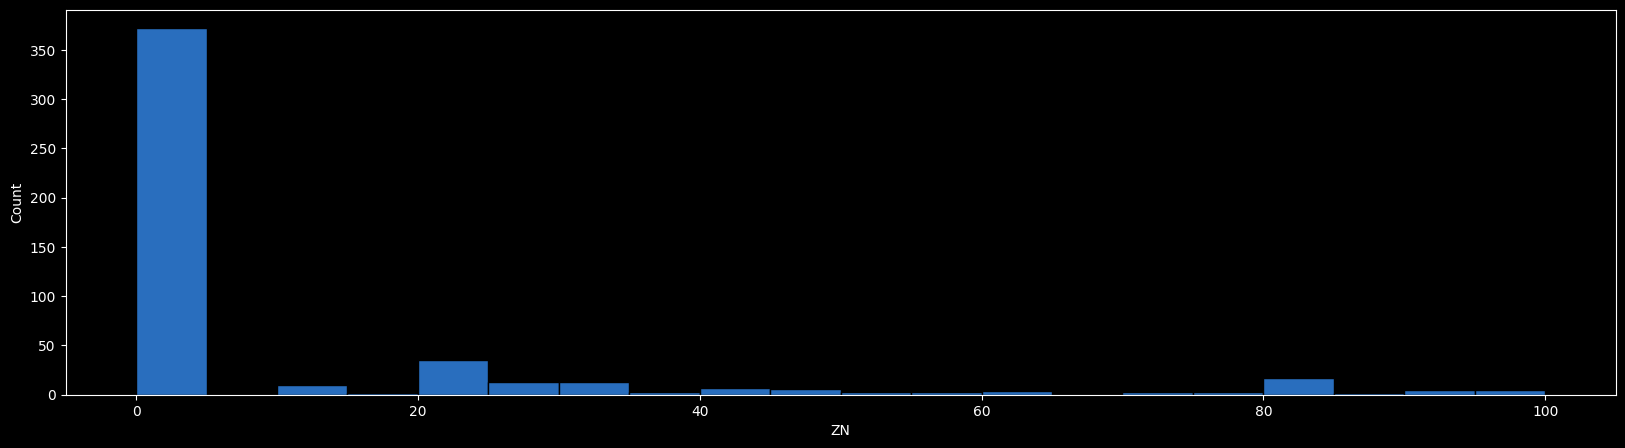

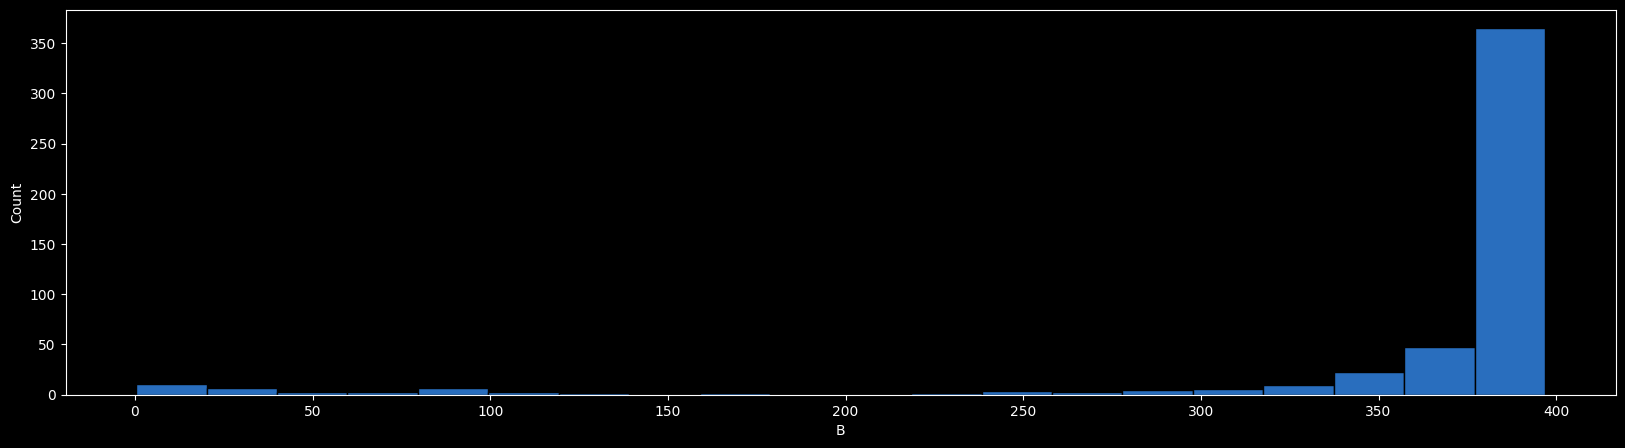

In [15]:
for feature in features:
    plt.figure(figsize=(20, 5))
    sns.histplot(df[feature], color="#3894FF", edgecolor="black", bins=20)
    plt.xlabel(f"{feature.upper()}")
    plt.ylabel("Count")

In [16]:
cdf = df[strong_features.index]
cdf

,medv,rm,zn,b
0,24.0,6.575,18.0,396.90
1,21.6,6.421,0.0,396.90
2,34.7,7.185,0.0,392.83
3,33.4,6.998,0.0,394.63
4,36.2,7.147,0.0,396.90
...,...,...,...,...
501,22.4,6.593,0.0,391.99
502,20.6,6.120,0.0,396.90
503,23.9,6.976,0.0,396.90
504,22.0,6.794,0.0,393.45


In [17]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [18]:
train

,medv,rm,zn,b
0,24.0,6.575,18.0,396.90
1,21.6,6.421,0.0,396.90
2,34.7,7.185,0.0,392.83
3,33.4,6.998,0.0,394.63
5,28.7,6.430,0.0,394.12
...,...,...,...,...
500,16.8,6.027,0.0,396.90
501,22.4,6.593,0.0,391.99
502,20.6,6.120,0.0,396.90
504,22.0,6.794,0.0,393.45


In [19]:
test

,medv,rm,zn,b
4,36.2,7.147,0.0,396.90
6,22.9,6.012,12.5,395.60
11,18.9,6.009,12.5,396.90
14,18.2,6.096,0.0,380.02
15,19.9,5.834,0.0,395.62
...,...,...,...,...
486,19.1,6.114,0.0,392.68
490,8.1,5.093,0.0,318.43
495,23.1,5.670,0.0,393.29
496,19.7,5.390,0.0,396.90


In [20]:
feature_1 = features[0]
feature_1

'rm'

<Axes: xlabel='rm', ylabel='medv'>

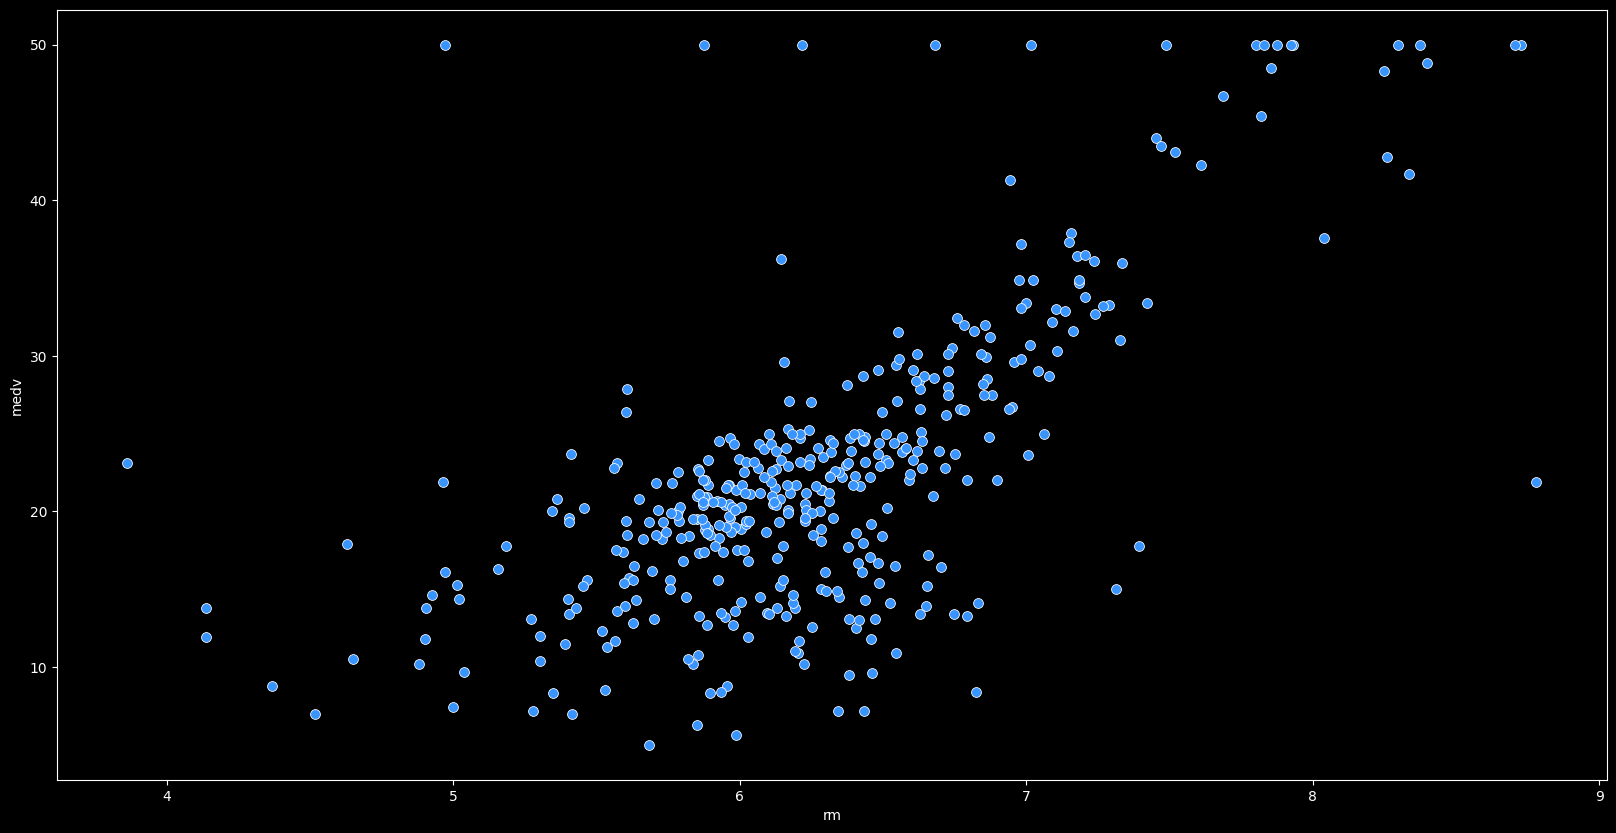

In [21]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=train.rm, y=train.medv, color="#3894FF", edgecolor="white", s=50)

In [22]:
train_x = np.asanyarray(train[[feature_1]])
train_y = np.asanyarray(train[[target_feature]])

test_x = np.asanyarray(test[[feature_1]])
test_y = np.asanyarray(test[[target_feature]])

In [23]:
print(train_x.shape, train_y.size, test_x.shape, test_y.size)

(417, 1) 417 (89, 1) 89


In [24]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(train_x, train_y)

LinearRegression()

In [25]:
coef = lr.coef_[0][0]
intercept = lr.intercept_[0]

In [26]:
print(lr.coef_[0][0], lr.intercept_[0])

9.172155692466944 -35.11189878775717


Text(0, 0.5, 'MEDV')

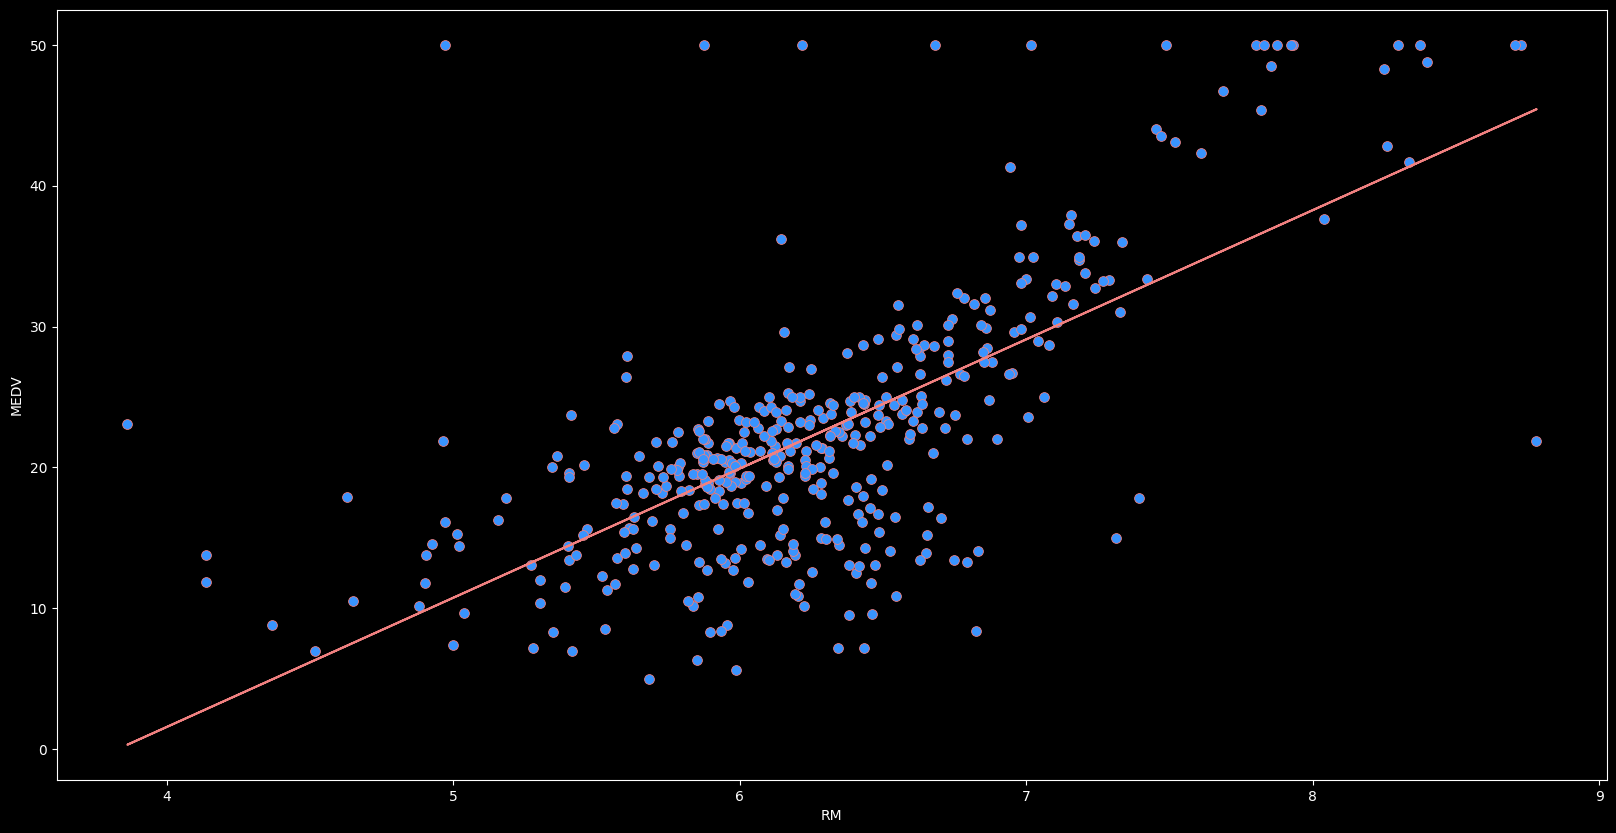

In [27]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=train.rm, y=train.medv, color="#3894FF", edgecolor="lightcoral", s=50)

plt.plot(train_x, coef * train_x + intercept, color="lightcoral")
plt.xlabel(feature_1.upper())
plt.ylabel(target_feature.upper())

In [28]:
from sklearn.metrics import r2_score

lr_prediction = lr.predict(test_x)

mae = np.mean(np.absolute(lr_prediction - test_y))
mse = np.mean((lr_prediction - test_y) ** 2)
rmse = np.sqrt(np.mean((lr_prediction - test_y) ** 2))

r2 = r2_score(lr_prediction, test_y)

In [29]:
print(mae, mse, rmse, r2)

3.9827049866582125 38.54491383284397 6.208455027850646 0.0872041357453861


In [30]:
feature_2 = features[1]
feature_2

'zn'

<Axes: xlabel='zn', ylabel='medv'>

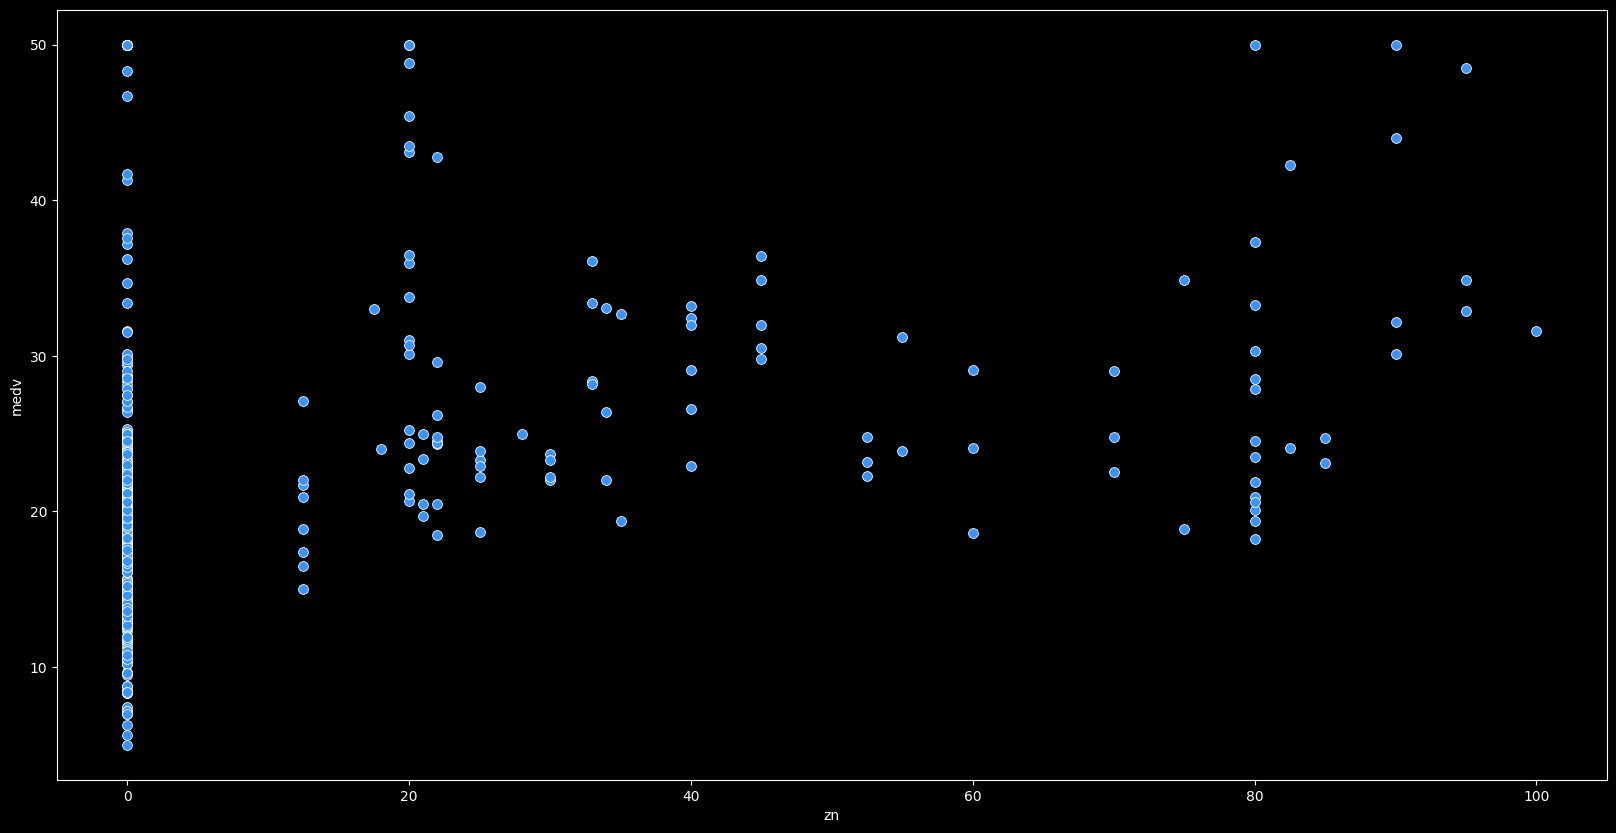

In [31]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=train.zn, y=train.medv, color="#3894FF", edgecolor="white", s=50)

In [32]:
from sklearn.model_selection import train_test_split


x = np.asanyarray(df[[feature_2]])
y = np.asanyarray(df[[target_feature]])

train_x, test_x, train_y, test_y = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [33]:
print(train_x.shape, train_y.size, test_x.shape, test_y.size)

(404, 1) 404 (102, 1) 102


In [34]:
lr = linear_model.LinearRegression()
lr.fit(train_x, train_y)

LinearRegression()

In [35]:
coef = lr.coef_[0][0]
intercept = lr.intercept_[0]

In [36]:
print(lr.coef_[0][0], lr.intercept_[0])

0.1247526403144805 21.353233067252766


In [37]:
prediction = lr.predict(test_x)

mae = np.mean(np.absolute(prediction - test_y))
mse = np.mean((prediction - test_y) ** 2)
rmse = np.sqrt(np.mean((prediction - test_y) ** 2))

r2 = r2_score(prediction, test_y)

In [38]:
print(mae, mse, rmse, r2)

5.3093455970113075 54.34745382306917 7.372072559536373 -5.080350642081957


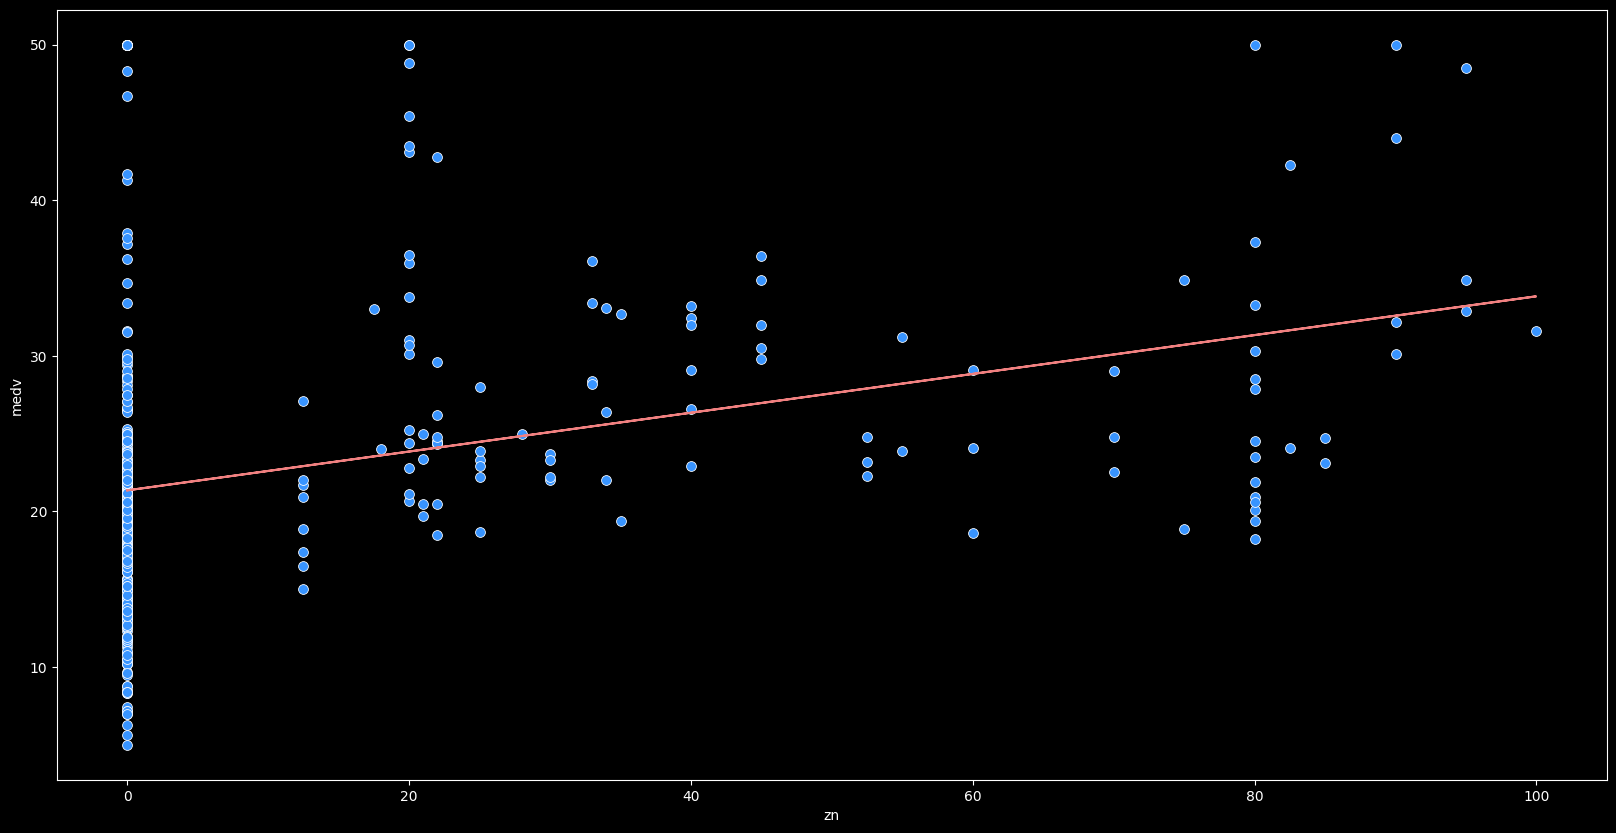

In [39]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=train.zn, y=train.medv, color="#3894FF", edgecolor="white", s=50)

plt.plot(train_x, coef * train_x + intercept, color="lightcoral")